## **Entrega 3 - ProyectoDS_ParteI**

### **Abstract**

En los últimos años, la energía solar fotovoltaica ha ganado popularidad debido no solo al aumento de la eficiencia de los paneles solares sino a la reducción de los costos asociados. Sin embargo, la ineherente naturaleza intermitente e incontrolable de la energía solar
genera inestabilidad en los sistemas fotovoltaicos que suministran
energía a la red, dificultando, en muchas ocasiones, su uso masivo. En este escenario, es imprescindible contar con técnicas fiables que permitan predecir la potencia generada por las celdas fotovoltaicas. En este trabajo, distintas técnicas basadas en machine learning serán utilizadas para predecir la potencia generada por las celdas fotovoltaicas a partir de datos climáticos históricos. 
En primer lugar, se tratarán los datos y se realizará un análisis exploratorio de mismos (EDA) para interpretarlos y establecer relaciones significativas entre ellos. Una vez hecho esto, se seleccionarán las variables más relevantes para la predicción de la potencia generada, así como los métodos de aprendizaje adecuados para la aplicación. Luego, se entrenarán, validarán y testearán los modelos elegidos, utilizando los datos apartados para tal fin. Finalmente, se calculará la precisión obtenida con cada uno de los modelos propuestos, se compararán y se seleccionará el de mejor rendimiento. 

### **Audiencia**
El análisis de los datos, el modelo predictivo desarrollado, sus resultados y las conclusiones obtenidas pueden ser información útil para distintas partes interesadas en el campo de la energía solar fotovoltaica. Por un lado, potenciales inversores pueden usar la información para decidir si la locación es adecuada para futuras instalaciones y/o ampliaciones de los paneles existentes. Por el otro lado, empresas de energía pueden usar las predicciones para diseñar un eficiente manejo de sus redes de distribución local.



### **Objetivos**
El principal objetivo de este proyecto es desarrollar un modelo de Data Science para predecir la potencia fotovoltaica generada por celdas solares a partir de datos climáticos históricos. Para esto, se persiguen los siguientes objetivos particulares:

- Entender el problema e identificar los elementos a ser considerados para el planteamiento del modelo predictivo.
- Pre-procesar los datos.
- Describir, interpretar, analizar y establecer relaciones significativas entre los datos mediante un análisis exploratorio de los datos (EDA).
- Seleccionar el/los métodos de machine learning que mejor se ajusten a las características del problema a resolver.
- Seleccionar las variables relevantes para el/los modelos elegidos.
- Entrenar y validar el/los modelos propuestos. 
- Evaluar los indicadores de desempeño predictivo del/de los modelos entrenados y realizar optimizaciones.
- En caso de haber desarrolaldo más de un modelo, comparar sus eficiencias y seleccionar el mejor de ellos. 
- Construir una presentación ejecutiva mostrando los resultados del proyecto. 



### **Principales preguntas e hipótesis** 
La pregunta que intentaremos resolver es la siguiente: ¿Cuál será la potencia fotovoltaica generada por un conjunto de celdas solares en un determinado período de tiempo? 
La principal hipótesis es que las variables climáticas históricas influyen en la generación de potencia fotovoltaica de las celdas solares. 
Es lógico pensar que las variables climáticas van a influir sobre la potencia fotovoltaica generada por las celdas solares. Sin embargo, esta premisa tendrá que ser comprobada a partir del análisis de los datos, así como en qué medida son relevantes y cuáles lo son más. 

### **PARTE I: Análisis de los datos**


#### Carga de librerías

In [136]:
import pandas as pd 
import numpy as np 
import os 
from os import listdir
from os.path import isfile, join 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings('ignore')

#### Descripción cualitativa de los datos:

Los datos fueron obtenidos de https://www.kaggle.com/. El archivo csv contiene 16 columnas. La descripción de cada columna es la siguiente:
- Day or Year: Día del año (0-365)
- Year: Año
- Mounth: Mes
- Day: Día
- First Hour of Period: Hora del día
- is day light: Si hay luz solar (Bool)
- Distance to solar noon: distancia al mediodia solar
- Average temperature (day): Temperatura promedio
- Average wind direction (day): Promedio de direccion del viento
- Average wind speed (day): Pomedio de velocidad del viento
- Sky Cover: Cobertura del cielo
- Visibility: Visibilidad
- Relative Humedity: Humedad Relativa
- Average Wind Speed Period: Promedio de velocidad del viento en ese periodo
- Average Barometric presure: Promedio de presion atmosferica
- Power Generated: Potencia generada

#### Carga de los datos

In [137]:
# Cargamos y presentamos los datos
df = pd.read_csv('/workspaces/Coder/data/raw/Energia_Solar.csv')
df

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,243,2009,8,31,10,True,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,243,2009,8,31,13,True,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,243,2009,8,31,16,True,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,243,2009,8,31,19,True,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


##### Información preliminar de los datos

In [138]:
# Información del dataset
df.info()
print(df.isna().sum().sort_values(ascending = False))
print('Los duplicados son' ,df.duplicated().sum() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day of Year                           2920 non-null   int64  
 1   Year                                  2920 non-null   int64  
 2   Month                                 2920 non-null   int64  
 3   Day                                   2920 non-null   int64  
 4   First Hour of Period                  2920 non-null   int64  
 5   Is Daylight                           2920 non-null   bool   
 6   Distance to Solar Noon                2920 non-null   float64
 7   Average Temperature (Day)             2920 non-null   int64  
 8   Average Wind Direction (Day)          2920 non-null   int64  
 9   Average Wind Speed (Day)              2920 non-null   float64
 10  Sky Cover                             2920 non-null   int64  
 11  Visibility       

### Data Wrangling

#### nulos + Duplicados

A partir de la carga de los datos y de la observación de la información preliminar del dataset, tenemos lo que sigue:

**Valores nulos**

El dataset no presenta valores nulos. 

**Valores Faltantes**

Vemos que tenemos un valor faltante en la columna *"Average Wind Speed (Period)"*. Al ser solo un valor, podremos eliminarlo o reemplazarlo sin que afecte la integridad de los datos. Ésto lo analizaremos a continuación.

**Tipos de datos**
- Variable booleana: Is Day Light  
- Variables categóricas: Year, Month, Day, Day of Year, First Hour of Period. 
- Variables numéricas: 
    - Variables continuas: Distance to Solar Noon, Average Temperature (Day), Average Wind Direction (Day), Average Wind Speed (Day),  Relative Humidity, Average Wind Speed (Period), Average Barometric Pressure (Period), Power Generated    
    - Variables discretas: Visibilidad (valores de 1 a 10 (con intervalo de 1)), Sky Cover (valores de 1 a 4 (con intervalo 1))

Las variables numéricas corresponden a datos climáticos y a la potencia fotovoltaica generada. Es de esperar que estos datos climáticos nos sirvan para estimar la cantidad de potencia fotovoltaica generada por las celdas solares. 

**Tipo de datos**

In [139]:
df.dtypes

Day of Year                               int64
Year                                      int64
Month                                     int64
Day                                       int64
First Hour of Period                      int64
Is Daylight                                bool
Distance to Solar Noon                  float64
Average Temperature (Day)                 int64
Average Wind Direction (Day)              int64
Average Wind Speed (Day)                float64
Sky Cover                                 int64
Visibility                              float64
Relative Humidity                         int64
Average Wind Speed (Period)             float64
Average Barometric Pressure (Period)    float64
Power Generated                           int64
dtype: object

**Valores Faltantes**

Buscamos en la fila en que se encuentra el valor faltante para analizarlo.

In [140]:
df[df.isnull().any(1)]

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
714,334,2008,11,29,7,True,0.406143,57,12,2.8,2,4.0,96,NaN,30.16,159


Al tratarse de una serie temporal, vamos a buscar el valor anterior y posterior de la velocidad del viento y los reemplazaremos por el valor medio entre ambos valores.

In [141]:
df.iloc[713:716,:]

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
713,334,2008,11,29,4,False,0.713311,57,12,2.8,4,4.0,96,5.0,30.17,0
714,334,2008,11,29,7,True,0.406143,57,12,2.8,2,4.0,96,NaN,30.16,159
715,334,2008,11,29,10,True,0.098976,57,12,2.8,3,7.0,80,8.0,30.19,7229


Reemplazamos el valor *n/a* por (8+5)/2 = 6.5 

In [142]:
df = df.fillna(6.5)
df.iloc[713:716,:]

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
713,334,2008,11,29,4,False,0.713311,57,12,2.8,4,4.0,96,5.0,30.17,0
714,334,2008,11,29,7,True,0.406143,57,12,2.8,2,4.0,96,6.5,30.16,159
715,334,2008,11,29,10,True,0.098976,57,12,2.8,3,7.0,80,8.0,30.19,7229


Ahora los datos quedarían sin *n/a*, sin nulos y sin valores duplicados

In [143]:
print(df.isna().sum().sort_values(ascending = False))
print('Los duplicados son' ,df.duplicated().sum() )

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             0
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64
Los duplicados son 0


Reemplazamos los nombres de las variables para simplificar algunas funciones ya que las columnas presentan nombres con espacio

In [144]:
# Renombramos las columnas para facilitar su manipulación
df = df.rename(columns = {'Day of Year':'day_year', 'Year':'year', 'Month':'month', 'Day':'day', 
'First Hour of Period':'first_hour_period','Is Daylight':'is_daylight', 'Distance to Solar Noon':'dist_solar_noon',
'Average Temperature (Day)':'avg_temp_day', 'Average Wind Direction (Day)':'avg_wd_day', 'Average Wind Speed (Day)':'avg_ws_day', 
'Sky Cover':'sky_over', 'Visibility':'visibility', 'Relative Humidity':'rel_hum', 'Average Wind Speed (Period)':'avg_ws_period',      
'Average Barometric Pressure (Period)':'avg_pres_period', 'Power Generated':'power_gen'})

#### Descripción de los datos (medidas de tendencia central)  

In [145]:
# Realizamos un describe para analizar las medida de tendencia central de los datos
df.iloc[:,6:16].describe().T

,count,mean,std,min,25%,50%,75%,max
dist_solar_noon,2920.0,0.503294,0.298024,0.050401,0.243714,0.478957,0.739528,1.141361
avg_temp_day,2920.0,58.468493,6.841200,42.000000,53.000000,59.000000,63.000000,78.000000
avg_wd_day,2920.0,24.953425,6.915178,1.000000,25.000000,27.000000,29.000000,36.000000
avg_ws_day,2920.0,10.096986,4.838185,1.100000,6.600000,10.000000,13.100000,26.600000
sky_over,2920.0,1.987671,1.411978,0.000000,1.000000,2.000000,3.000000,4.000000
visibility,2920.0,9.557705,1.383884,0.000000,10.000000,10.000000,10.000000,10.000000
rel_hum,2920.0,73.513699,15.077139,14.000000,65.000000,77.000000,84.000000,100.000000
avg_ws_period,2920.0,10.127911,7.260613,0.000000,5.000000,9.000000,15.000000,40.000000
avg_pres_period,2920.0,30.017760,0.142006,29.480000,29.920000,30.000000,30.110000,30.530000
power_gen,2920.0,6979.846233,10312.336413,0.000000,0.000000,404.000000,12723.500000,36580.000000


#### Análisis descriptivo de los Datos (EDA) +outliers

##### 1. Análisis de la distribución de la potencia generada (Analisis univariado)

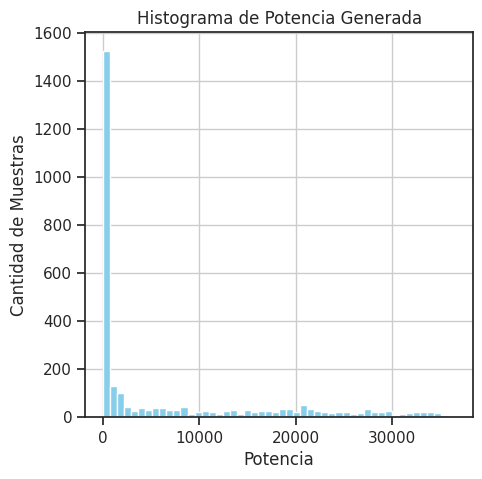

In [146]:
# estudiamos la distribución de la potencia generada (histograma)
fig, ax = plt.subplots(figsize=(5,5))
df.loc[:,'power_gen'].hist(bins=50,figsize=(5,5), facecolor='skyblue')
ax.set_title('Histograma de Potencia Generada')
ax.set_xlabel('Potencia')
ax.set_ylabel('Cantidad de Muestras')
ax.grid(True)
plt.show()
#fig.savefig('../Entregas Coder/Figuras/01_mpl_Hist_Pot.png')

Podemos observar que la mayoría de las muestras se encuentran con potencia cero o muy baja potencia generada. Realizamos un boxplot de la potencia generada para observar la distribución de sus cuartiles e identificar outliers.

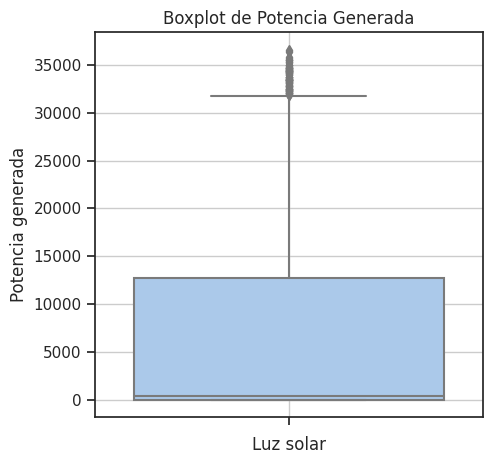

In [147]:
# estudiamos la distribución de la potencia generada a partir de un boxplot 
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(5,5)) #defino el tamaño del grafico
sns.boxplot(y = 'power_gen', data = df, color = 'b', ax=ax)
ax.set_xlabel('Luz solar')
ax.set_ylabel('Potencia generada')
ax.set_title('Boxplot de Potencia Generada')
ax.grid(True)
plt.show()

Nuevamente, observamos que la mediana de la potencia generada se encuentra cercana al cero y los valores por encima de 32000 los considera outliers. Estudiaremos qué sucede con la potencia generada usando la luz solar como filtro. Es decir, analizaremos la potencia generada en presencia y ausencia de luz solar, is_daylight = True y is_daylight = False, respectivamente.

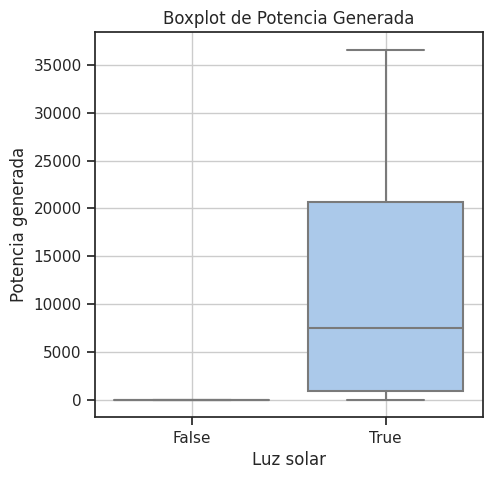

In [148]:
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(5,5)) #defino el tamaño del grafico
sns.boxplot(y = 'power_gen', x="is_daylight", data = df, color = 'b', ax=ax)
ax.set_xlabel('Luz solar')
ax.set_ylabel('Potencia generada')
ax.set_title('Boxplot de Potencia Generada')
ax.grid(True)
plt.show()

Como vemos en la gráfico de barras, la potencia generada cuando no hay luz solar es cero. Por lo tanto, para estimar la potencia generada 
se utilizarán las variables solo en el caso de que haya luz solar. Es decir, filtraremos cada una de las variables por la variable categórica is_daylight = True. De esta manera, podremos predecir la potencia generada durante las horas de luz solar, ya que durante las restantes, la potencia será cero. 

In [149]:
# nos quedamos con los datos correspondientes al período de luz solar
df_dia = df.query('is_daylight == True')
df_dia.describe().T

,count,mean,std,min,25%,50%,75%,max
day_year,1805.0,178.772853,101.128628,1.000000,94.000000,176.000000,263.000000,366.000000
year,1805.0,2008.698061,0.459226,2008.000000,2008.000000,2009.000000,2009.000000,2009.000000
month,1805.0,6.377285,3.301890,1.000000,4.000000,6.000000,9.000000,12.000000
day,1805.0,15.754571,8.786273,1.000000,8.000000,16.000000,23.000000,31.000000
first_hour_period,1805.0,12.434903,4.357474,4.000000,10.000000,13.000000,16.000000,19.000000
dist_solar_noon,1805.0,0.309599,0.177346,0.050401,0.151584,0.305898,0.447496,0.775717
avg_temp_day,1805.0,58.829917,6.748194,42.000000,54.000000,59.000000,63.000000,78.000000
avg_wd_day,1805.0,25.259280,6.593715,1.000000,26.000000,27.000000,29.000000,36.000000
avg_ws_day,1805.0,10.324875,4.780630,1.100000,6.900000,10.300000,13.300000,26.600000
sky_over,1805.0,2.019391,1.347643,0.000000,1.000000,2.000000,3.000000,4.000000


Al quitar los datos registrados durante las horas en donde no hay luz solar, conservamos 1805 muestras, por lo que seguimos teniendo datos suficientes para hacer le estimación de la potencoia generada durante el día.

Estudiamos la potencia generada durante las horas de luz solar:

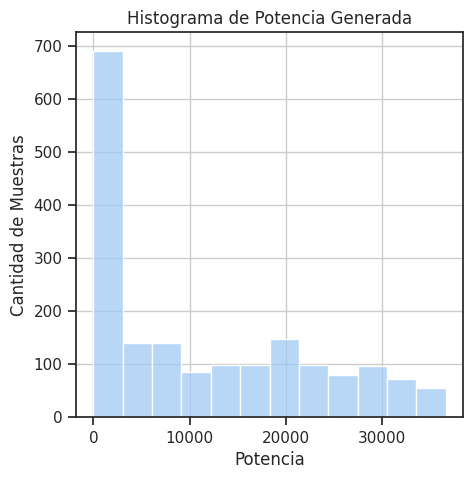

In [150]:
# estudiamos la distribución de la potencia generada durante las horas de luz solar
fig, ax = plt.subplots(figsize=(5,5)) #defino el tamaño del grafico
sns.set_theme(style="ticks", palette="pastel")
#sns.displot(x = 'power_gen', data = df_dia)
sns.histplot(x = 'power_gen', data = df_dia, ax=ax, color = 'b')
ax.set_title('Histograma de Potencia Generada')
ax.set_xlabel('Potencia')
ax.set_ylabel('Cantidad de Muestras')
ax.grid(True)
plt.show()
fig.savefig('../Entregas Coder/Figuras/02_sn_Hist_Pot.png')

Si bien la distribución se modificó, la tendencia sigue estando hacia los valores bajos de potencia.  

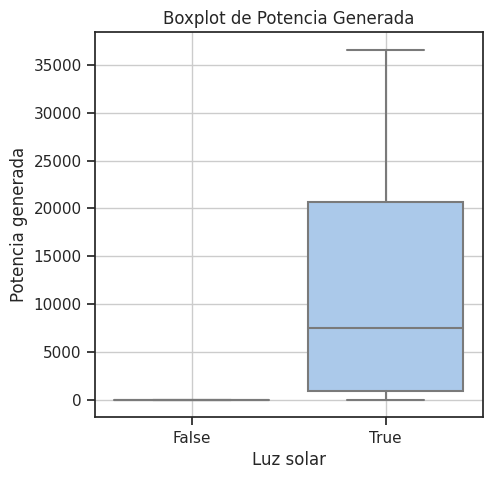

In [151]:
#volvemos a analizar el boxplot, ahora con la potencia genereada solo durante la presencia de luz solar
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(5,5)) #defino el tamaño del grafico
sns.boxplot(y = 'power_gen', x = 'is_daylight', data = df, color = 'b', ax=ax)
ax.set_xlabel('Luz solar')
ax.set_ylabel('Potencia generada')
ax.set_title('Boxplot de Potencia Generada')
ax.grid(True)
plt.show()
fig.savefig('../Entregas Coder/Figuras/03_sn_BoxPlot_Pot.png')

Como observamos, la mediana de potencia aumentó de manera considerable, y ya no consideran como outliers los valores por encima de 32000.

##### 2. Análisis de la dinámica de la potencia generada 

Para analizar la estacionalidad de la potencia generada y cómo (si es que lo hacen) los distintos meses (correspondientes a las distintas estaciones del año) influyen en ella, graficamos la potencia media generada por mes.

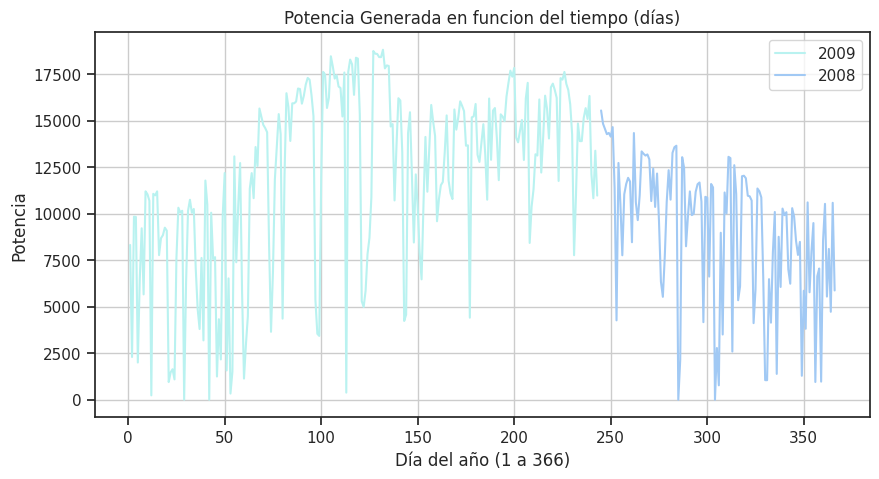

In [152]:
# Data for plotting
#separamos el detaset en los dos años para los que se recogieron los datos (2008 y 2009) 
# y calculamos la potencia media generada por mes:
df_avg_dia_2008 = df_dia.groupby('day_year').mean().query('year == 2008')
df_avg_dia_2009 = df_dia.groupby('day_year').mean().query('year == 2009')
avg_pot_dia_2008 = df_avg_dia_2008[['power_gen']]
df_dia_2008 = df_dia.query('year == 2008')
t_2008 = df_dia_2008['day_year'].unique()
avg_pot_dia_2009 = df_avg_dia_2009[['power_gen']]
df_dia_2009 = df_dia.query('year == 2009')
t_2009 = df_dia_2009['day_year'].unique()

# gráfica de la dinámica de la potencia en el tiempo (por día del año)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(t_2009, avg_pot_dia_2009, "c", label = "2009")
plt.plot(t_2008, avg_pot_dia_2008, "b", label = "2008")
ax.set_title("Potencia Generada en funcion del tiempo (días)")
ax.set_xlabel("Día del año (1 a 366)")
ax.set_ylabel("Potencia")
ax.legend()
ax.grid(True)
plt.show()
fig.savefig('../Entregas Coder/Figuras/03_mpl_LinePlot_Pot.png')

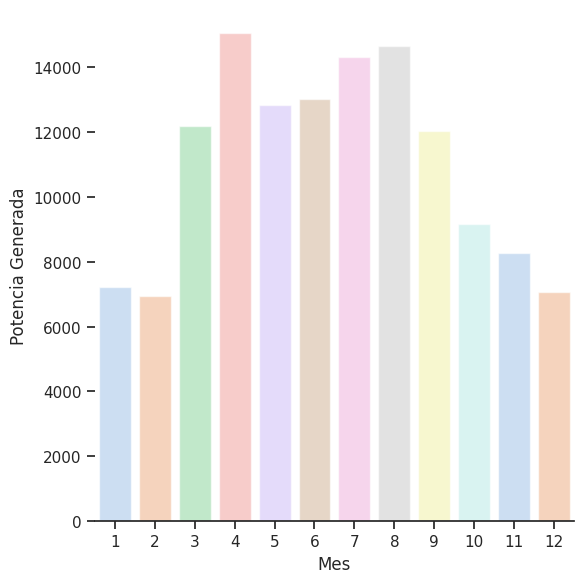

In [153]:
# Barplot: Gráfica de la potencia media generada por mes
df_dia.groupby('day_year').mean()
g = sns.catplot(
    data=df_dia.groupby('day_year').mean().groupby('month').mean(), kind="bar",
    x=[1,2,3,4,5,6,7,8,9,10,11,12], y="power_gen",
    errorbar="sd", palette="pastel", alpha=.6, height=6, color = 'b'
)
g.despine(left=True)
g.set_axis_labels("Mes", "Potencia Generada")

g.savefig('../Entregas Coder/Figuras/04_sn_BarPlot_Mes_Pot.png')

Vemos que tenemos mayor poder de generación en los meses 3 a 9.
Ahora vamos a analizar la estabilidad de dichos valores mediante un BoxPlot teniendo en cuenta además los diferentes rangos horarios.

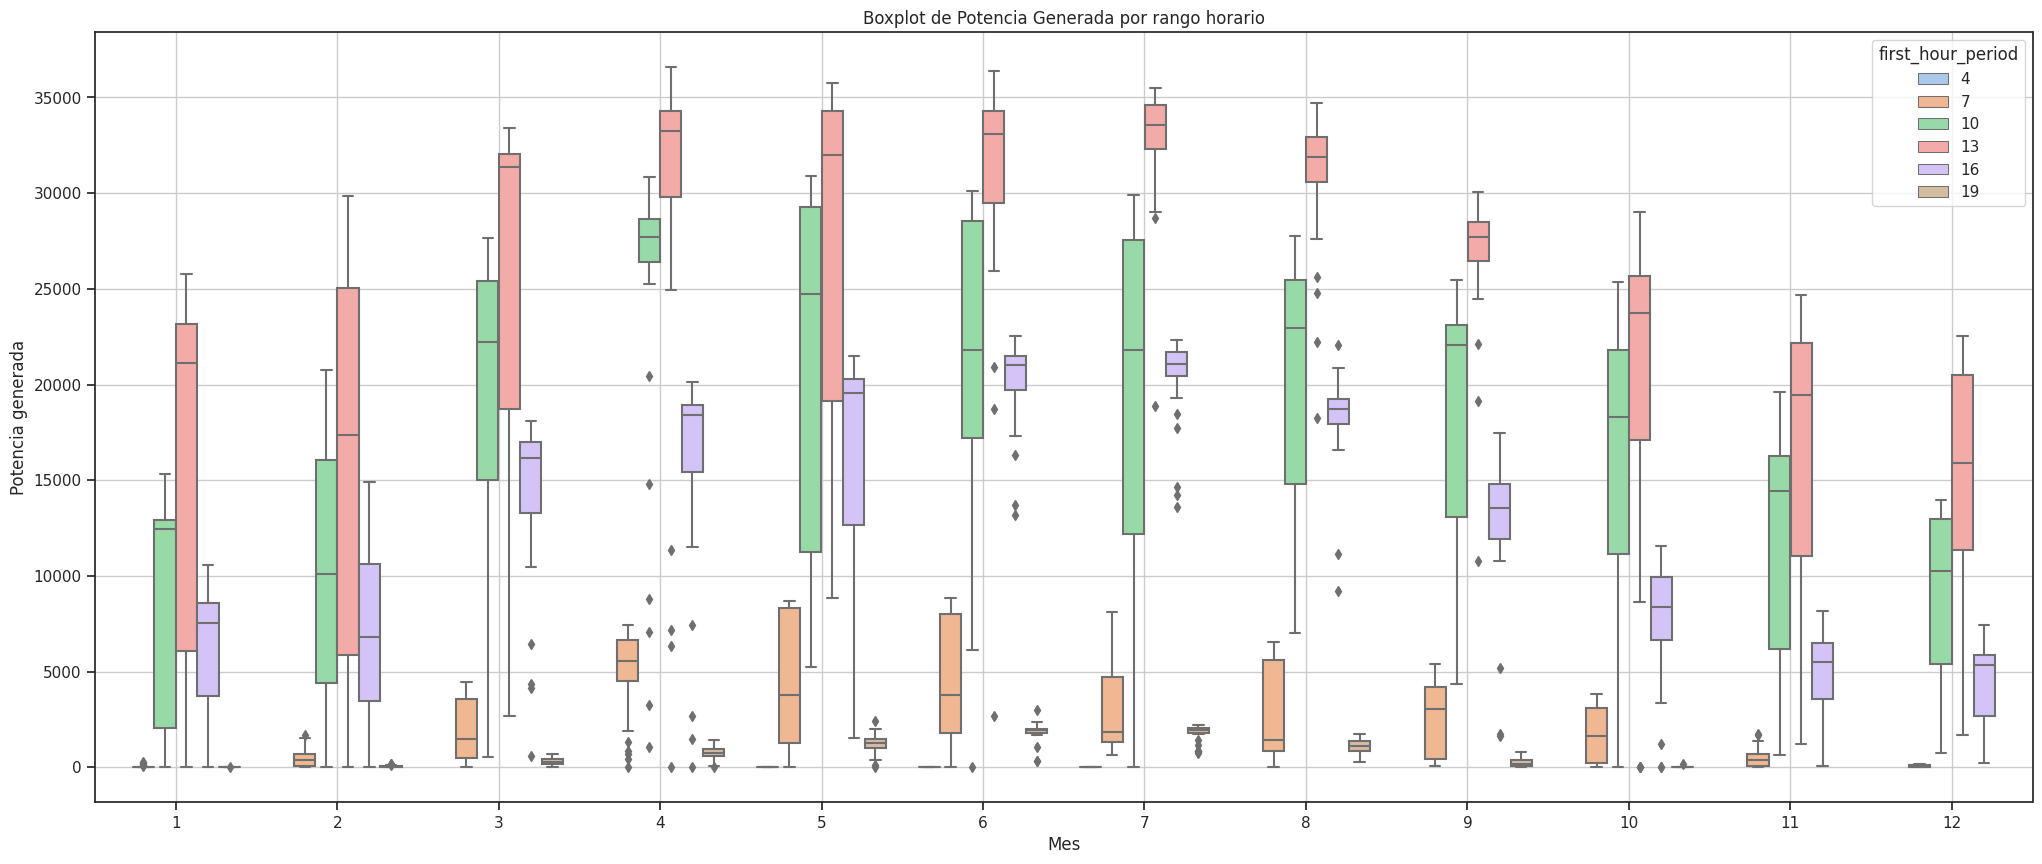

In [154]:
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(25,10)) #defino el tamaño del grafico
sns.boxplot(y = 'power_gen', x = 'month', hue='first_hour_period', data = df_dia, ax=ax)
ax.set_xlabel('Mes')
ax.set_ylabel('Potencia generada')
ax.set_title('Boxplot de Potencia Generada por rango horario')
ax.set_label("Rangos horarios")
ax.grid(True)
plt.show()


La gráfica anterior nos permite sacar varias conclusiones:
1. Vemos que la potencia generada tiene sus valores más altos en los meses 3 a 9 y en el rango horario de 13 a 16 Hs.
2. Podemos observar que durante los rangos horarios 10-13,13-16 y 16-19 son los que más aportan a la potencia media generada, ya que seguramente se donde mayor potencia solar tenemos, estamos más cerca del sol, hay mayor temperatura, etc.
3. Vemos que durante los meses de mayor potencia generada, tambien tenemos una menor disporsion de los datos (Variabilidad durante ese mes), esto nos indica que son meses donde las variables climaticas de interes son mas estables y esa estabilidad se da marcadamente en los horarios de 13-16 y 16-19.

Luego, analizamos la potencia generada a lo largo de todo un año (período en el cual se hizo la adquisición de los datos).

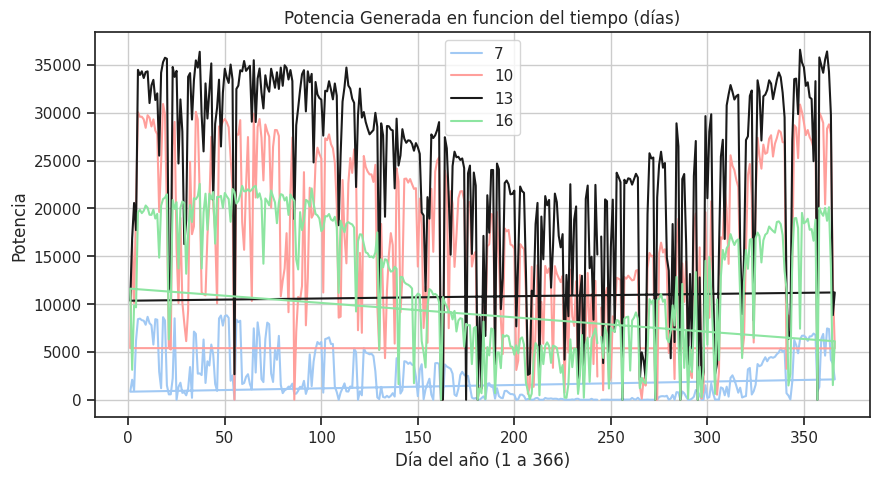

In [155]:
df_avg_dia_7 = df_dia.loc[df_dia['first_hour_period'] == 7].groupby('day_year').mean()
df_avg_dia_10 = df_dia.loc[df_dia['first_hour_period'] == 10].groupby('day_year').mean()
df_avg_dia_13 = df_dia.loc[df_dia['first_hour_period'] == 13].groupby('day_year').mean()
df_avg_dia_16 = df_dia.loc[df_dia['first_hour_period'] == 16].groupby('day_year').mean()

avg_pot_dia_7 = df_avg_dia_7[['power_gen']]
avg_pot_dia_10 = df_avg_dia_10[['power_gen']]
avg_pot_dia_13 = df_avg_dia_13[['power_gen']]
avg_pot_dia_16 = df_avg_dia_16[['power_gen']]

t = df_dia['day_year'].unique()

fig, ax = plt.subplots(figsize=(10,5))
plt.plot(t, avg_pot_dia_7, label = "7")
plt.plot(t, avg_pot_dia_10, "r", label = "10")
plt.plot(t, avg_pot_dia_13, "k", label = "13")
plt.plot(t, avg_pot_dia_16, "g", label = "16")

ax.set_title("Potencia Generada en funcion del tiempo (días)")
ax.set_xlabel("Día del año (1 a 366)")
ax.set_ylabel("Potencia")
ax.legend()
ax.grid(True)
plt.show()


#### Análisis de las variables climáticas

##### 1. Distribución de las variables climáticas

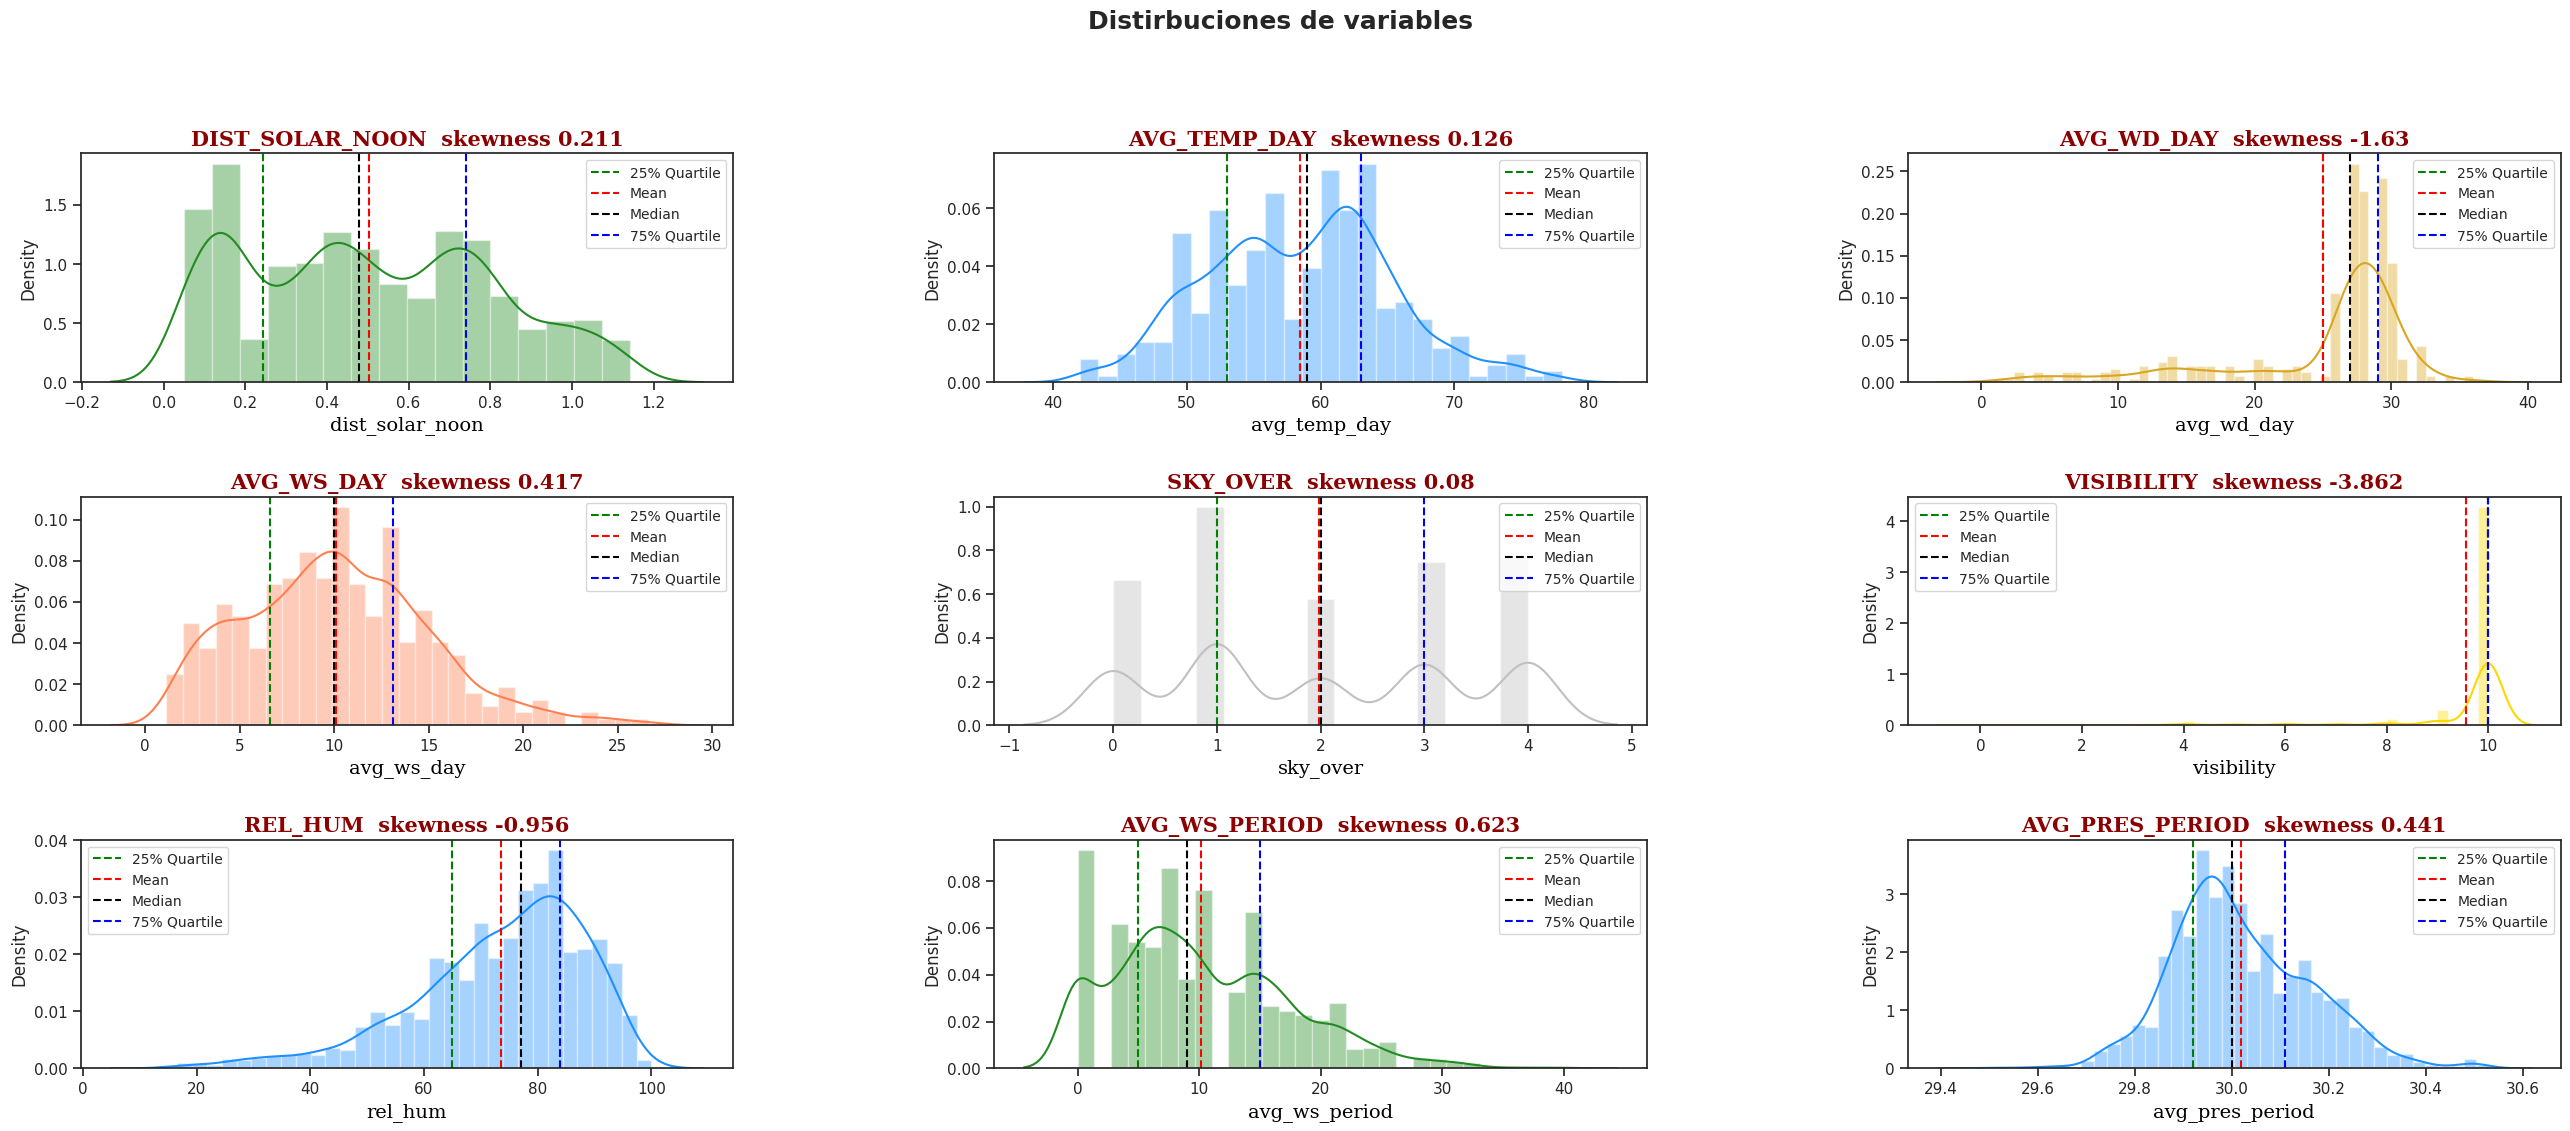

In [156]:
#Definiciones
df_dia_clima = df_dia.iloc[:,6:15]
df_clima = df.iloc[:,6:15]

# Colores para distribuciones
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'forestgreen','dodgerblue','goldenrod']#, 'coral' , 'silver' , 'gold', 'red', 'blue'];
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 15}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}


fig = plt.figure(figsize=[32,24])
fig.suptitle('Distirbuciones de variables', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(df_clima):
    ax = fig.add_subplot(6, 3, i+1)
    ax = sns.distplot(df[col],  color=colours[i]) 
    # Lineas verticales
    ax.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile') # Q1
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean') # Media
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median') # Mediana
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile') # Q3
    # ax.text('asimetria: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()}  skewness {round(df[col].skew(),3)}', fontdict=axtitle_dict)
    ax.legend(fontsize=10) 

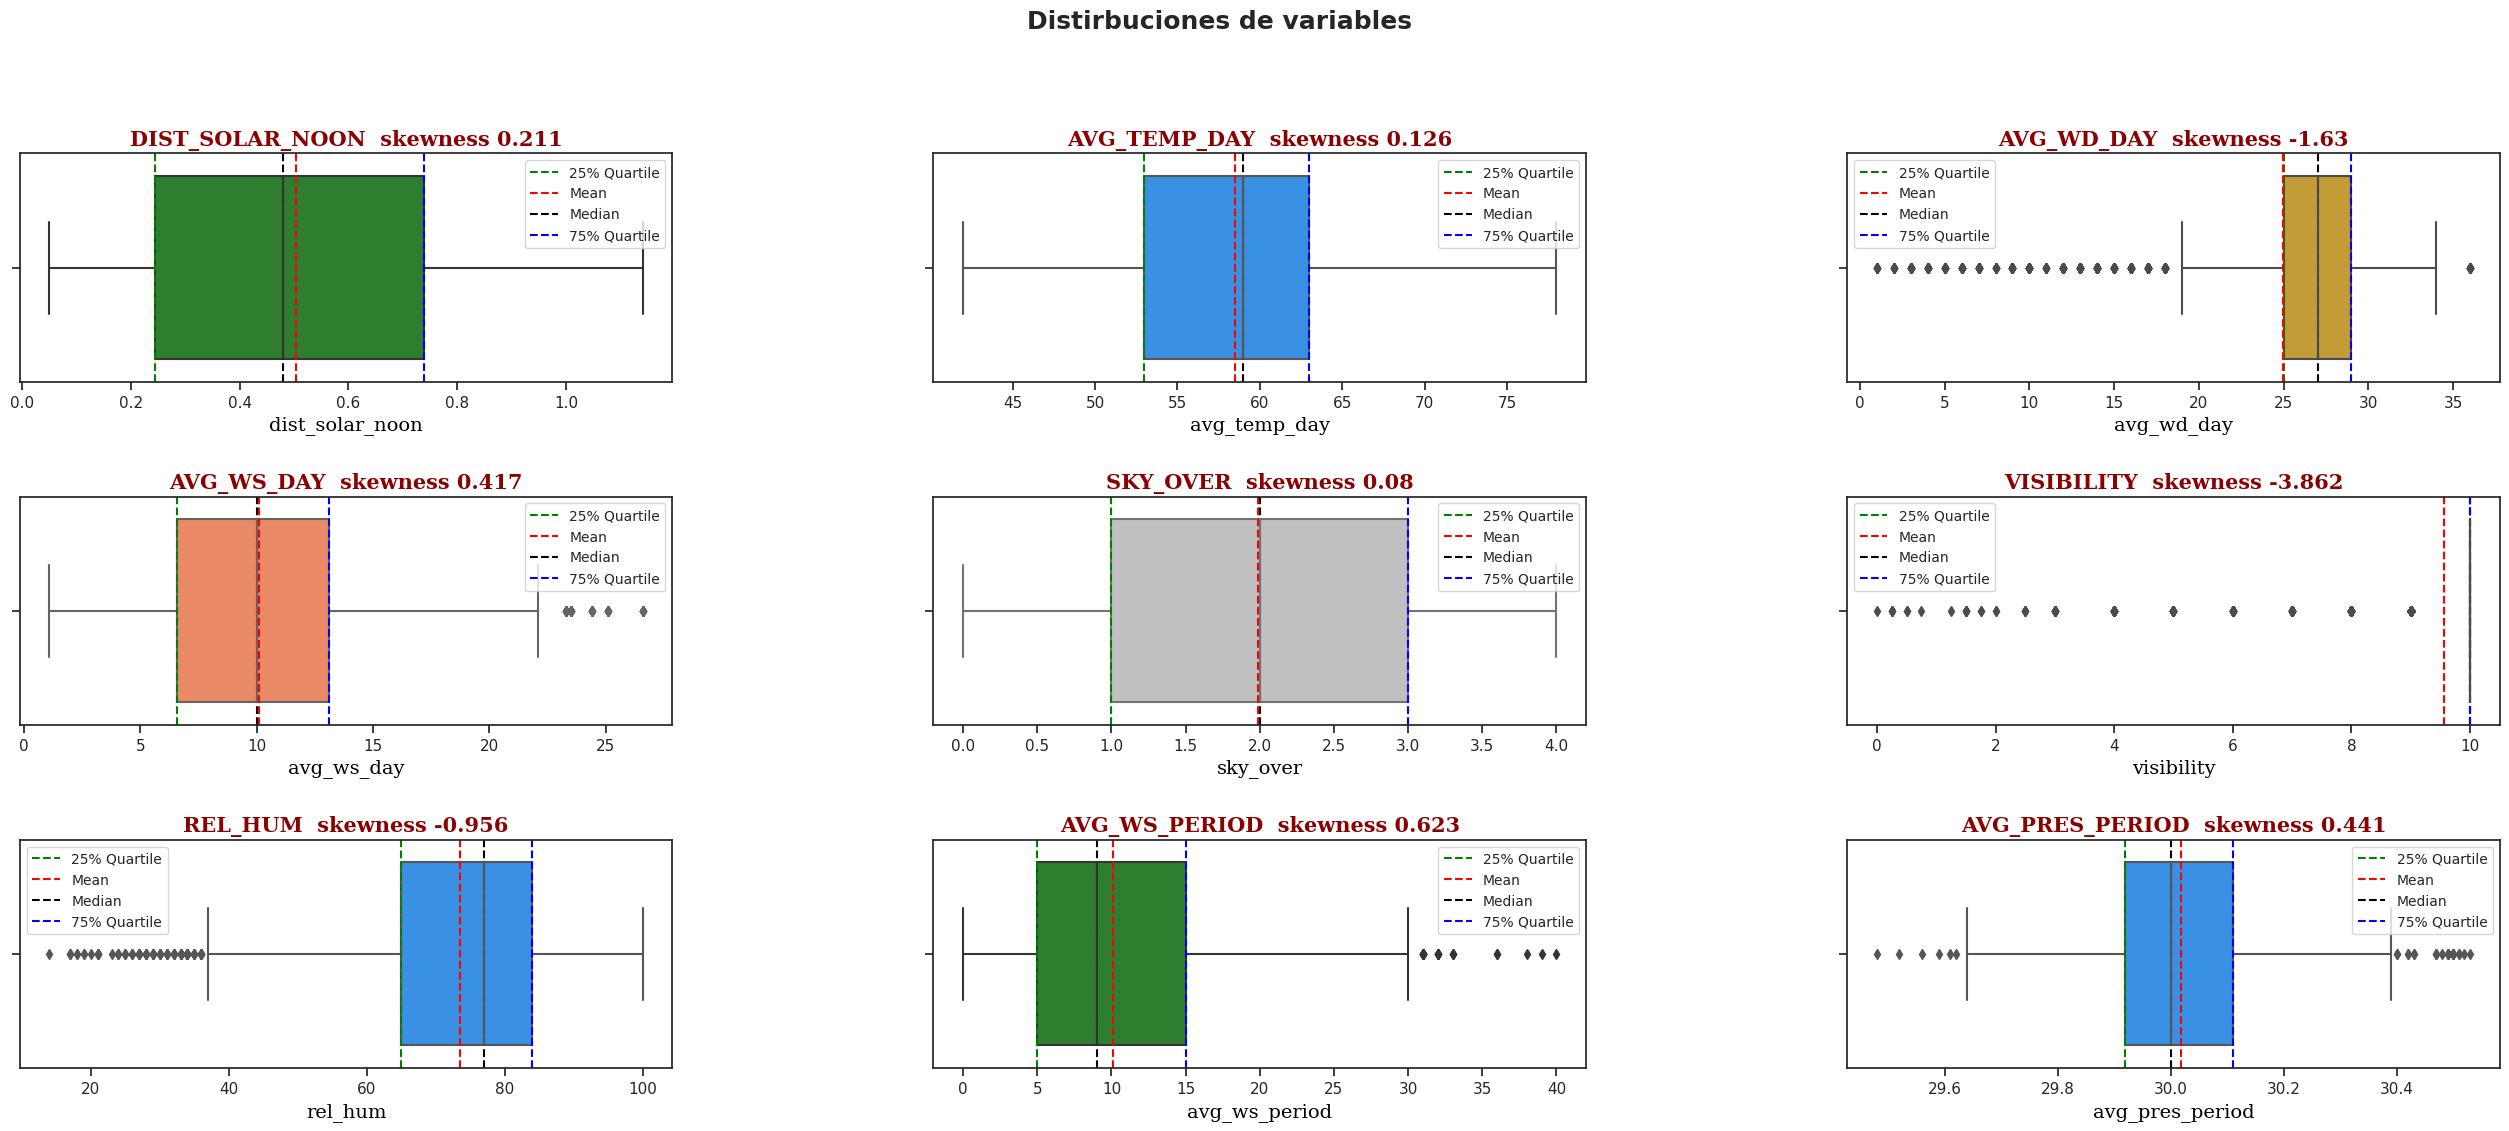

In [157]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('Distirbuciones de variables', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(df_clima):
    ax = fig.add_subplot(6, 3, i+1)
    ax = sns.boxplot(data = df, x=col ,  color= colours[i]);
    # Lineas verticales
    ax.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile') # Q1
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean') # Media
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median') # Mediana
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile') # Q3
    # ax.text('asimetria: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()}  skewness {round(df[col].skew(),3)}', fontdict=axtitle_dict)
    ax.legend(fontsize=10) 

## Outliers

Vemos que las variables presentan varios outliers.

In [158]:
df_clima.describe()

Q1 = df_clima.quantile(0.25)
Q3 = df_clima.quantile(0.75)
IQR = Q3 - Q1

((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any() # Verificar si hay al menos uno con esta condicion
# Si tenemos outliers

dist_solar_noon    False
avg_temp_day       False
avg_wd_day          True
avg_ws_day          True
sky_over           False
visibility          True
rel_hum             True
avg_ws_period       True
avg_pres_period     True
dtype: bool

In [159]:
# Encontremos el IQR para todas la columnas
dict = {}
for col in df_clima:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

dict

{'upper_limit_dist_solar_noon': 1.4832478081249998,
 'lower_limit_dist_solar_noon': -0.5000063228749999,
 'upper_limit_avg_temp_day': 78.0,
 'lower_limit_avg_temp_day': 38.0,
 'upper_limit_avg_wd_day': 35.0,
 'lower_limit_avg_wd_day': 19.0,
 'upper_limit_avg_ws_day': 22.85,
 'lower_limit_avg_ws_day': -3.1500000000000004,
 'upper_limit_sky_over': 6.0,
 'lower_limit_sky_over': -2.0,
 'upper_limit_visibility': 10.0,
 'lower_limit_visibility': 10.0,
 'upper_limit_rel_hum': 112.5,
 'lower_limit_rel_hum': 36.5,
 'upper_limit_avg_ws_period': 30.0,
 'lower_limit_avg_ws_period': -10.0,
 'upper_limit_avg_pres_period': 30.394999999999996,
 'lower_limit_avg_pres_period': 29.635000000000005}

In [167]:
for col in df_clima:
    print('Total de {} Valores en {} menores al limite inferior.'.format(len(df[df[col] < dict['lower_limit_' + col]] ) , col))
    print('Total de {} Valores en {} mayores al limite superior.'.format(len(df[df[col] > dict['upper_limit_' + col]] ) , col))

Total de 0 Valores en dist_solar_noon menores al limite inferior.
Total de 0 Valores en dist_solar_noon mayores al limite superior.
Total de 0 Valores en avg_temp_day menores al limite inferior.
Total de 0 Valores en avg_temp_day mayores al limite superior.
Total de 0 Valores en avg_wd_day menores al limite inferior.
Total de 0 Valores en avg_wd_day mayores al limite superior.
Total de 0 Valores en avg_ws_day menores al limite inferior.
Total de 0 Valores en avg_ws_day mayores al limite superior.
Total de 0 Valores en sky_over menores al limite inferior.
Total de 0 Valores en sky_over mayores al limite superior.
Total de 0 Valores en visibility menores al limite inferior.
Total de 0 Valores en visibility mayores al limite superior.
Total de 0 Valores en rel_hum menores al limite inferior.
Total de 0 Valores en rel_hum mayores al limite superior.
Total de 0 Valores en avg_ws_period menores al limite inferior.
Total de 0 Valores en avg_ws_period mayores al limite superior.
Total de 0 Val

Vemos que en algunas de las variables tenemos una alta tasa de outliers, por lo tanto vamos a reemplazar los outliers por los valores límites.

In [161]:
for col in df_clima:
    df[col] = np.where(
        df[col] > dict['upper_limit_' + col], # si se comple
        dict['upper_limit_' + col], # poner limite superior (Q3+1.5IQR)
        np.where( # en caso contrario
            df[col] < dict['lower_limit_' + col], # si es menor al limite inferior
            dict['lower_limit_' + col], # poner el Q1-1.5IQR
            df[col]  # si no se cumple nada dejar quieto
        )
    )

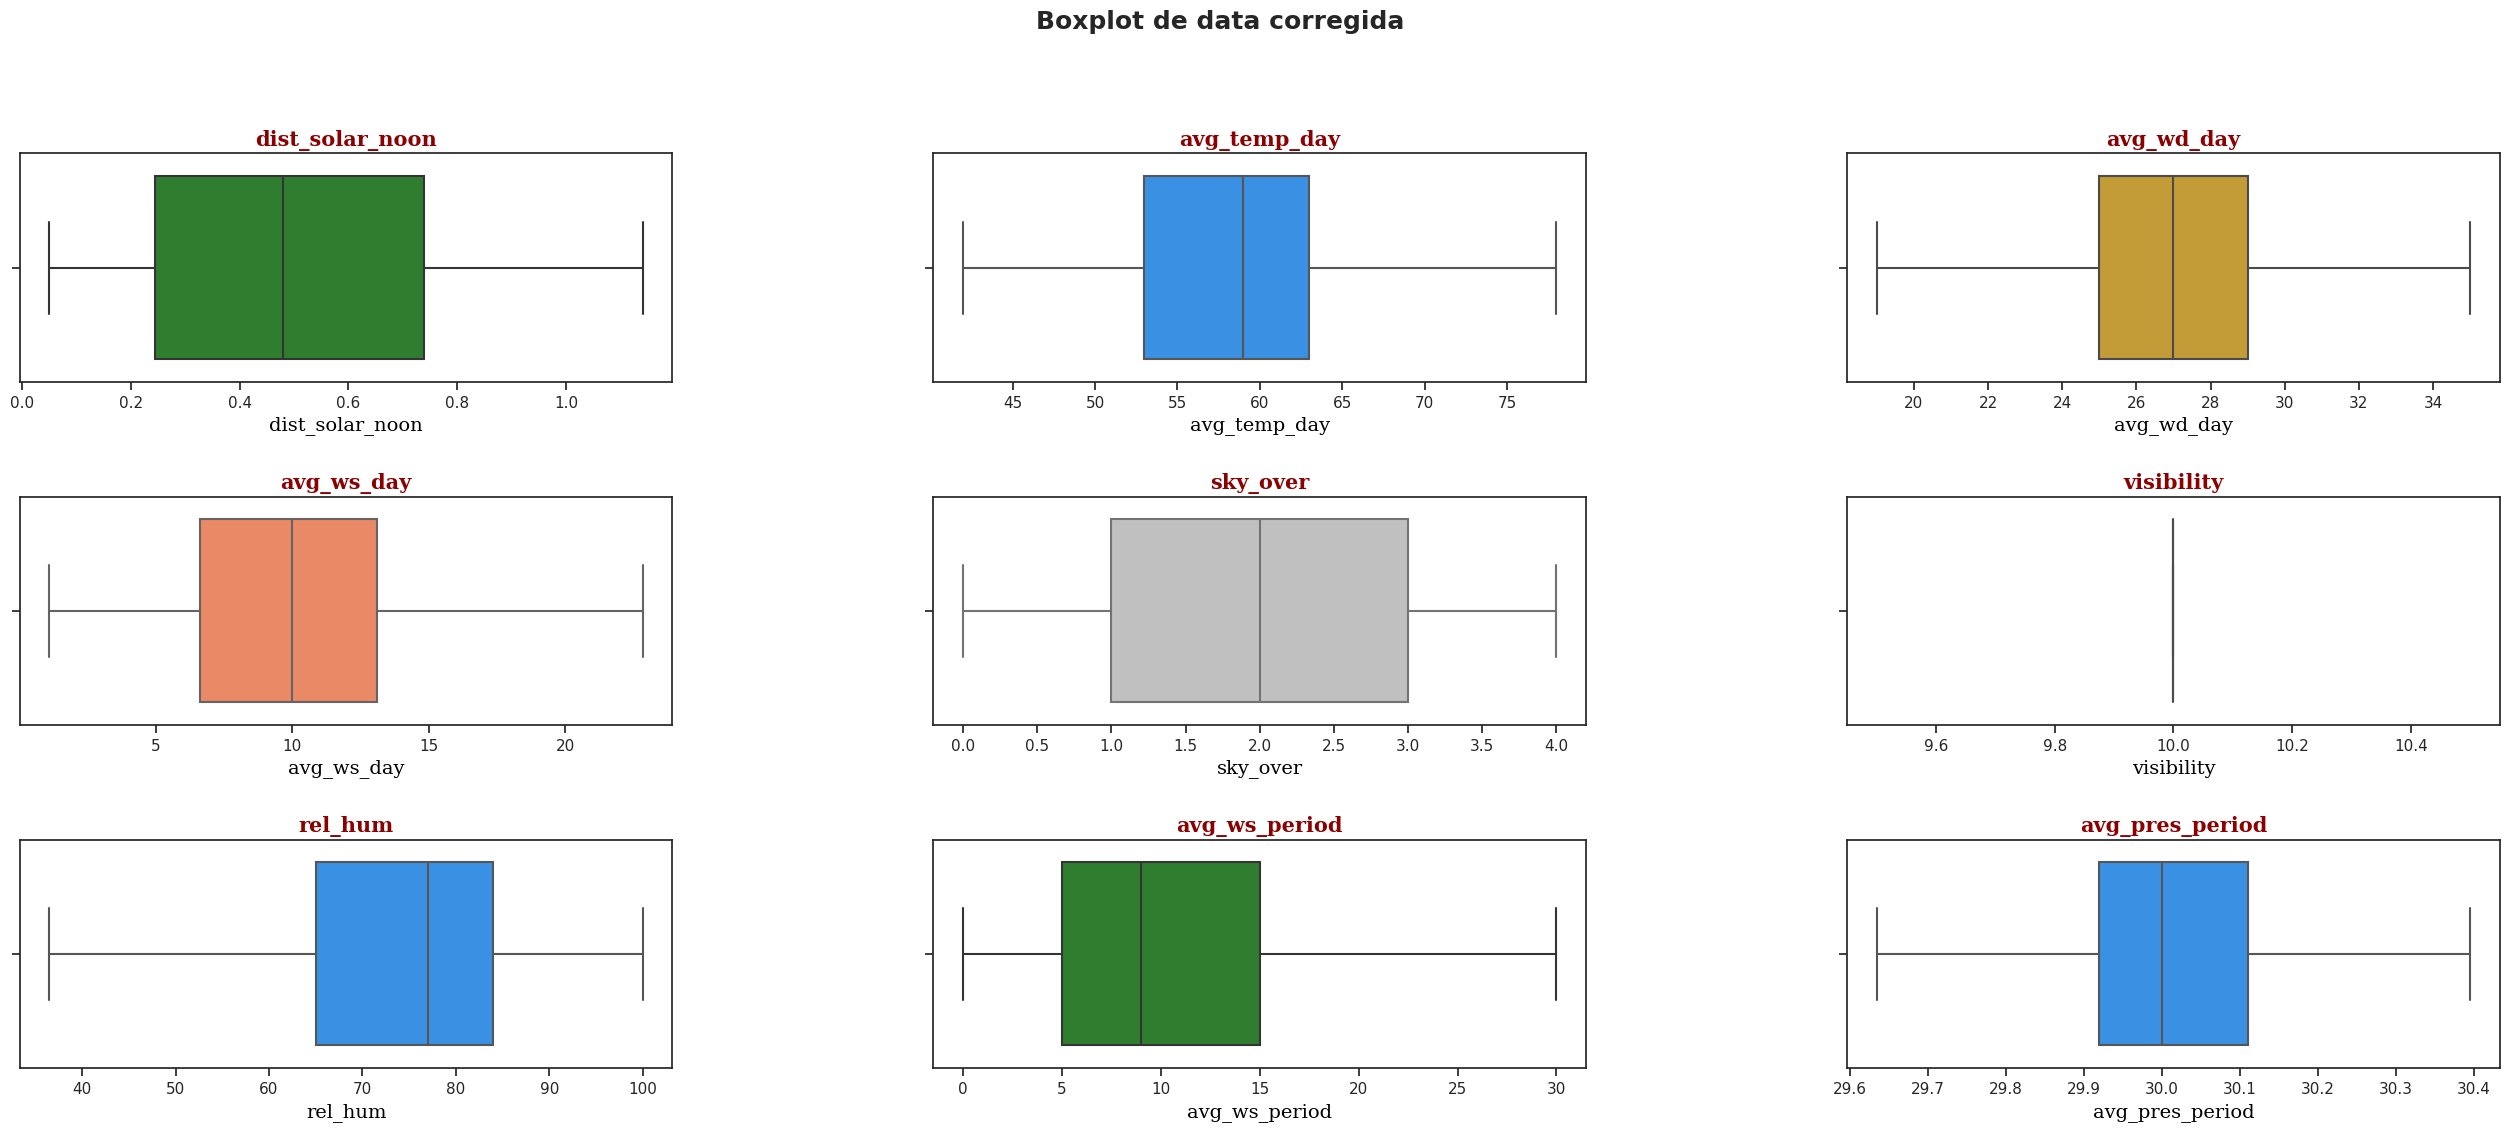

In [162]:
# Verificando
fig = plt.figure(figsize=[32,24])
fig.suptitle('Boxplot de data corregida', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(df_clima):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);

    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

Vemos que la visibilidad se quedo con 1 solo valor, esto complicará la correlación de visibilidad con respecto a la potencia generada.

#### Correlación de las variables climáticas con la potencia generada


Para poder encontrar las variables que nos ayudarán a estimar la potencia generada, analizamos, como una primera aproximación, su correlación.

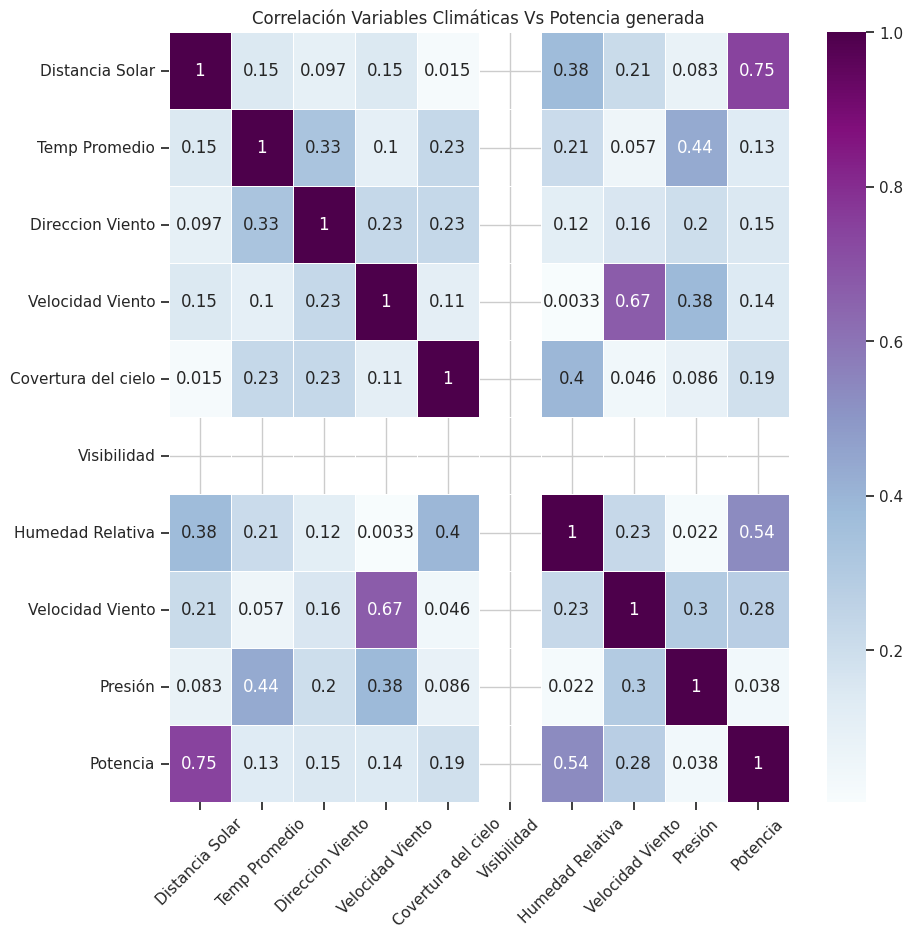

In [163]:
# Visualizamos la correlación de los datos (variables climáticas) con la potencia generada
fig1, ax = plt.subplots(figsize=(10, 10))
xticklabels = ["Distancia Solar","Temp Promedio", "Direccion Viento",  "Velocidad Viento", "Covertura del cielo", "Visibilidad", "Humedad Relativa", "Velocidad Viento", "Presión","Potencia"]
yticklabels = ["Distancia Solar","Temp Promedio", "Direccion Viento", "Velocidad Viento", "Covertura del cielo", "Visibilidad", "Humedad Relativa", "Velocidad Viento", "Presión","Potencia"]
g = sns.heatmap(df.iloc[:,6:16].corr().abs(), annot=True, linewidths=.5, ax=ax, xticklabels=xticklabels, yticklabels= yticklabels,cmap="BuPu")
ax.set_title('Correlación Variables Climáticas Vs Potencia generada')
ax.grid(True)
plt.xticks(rotation = 45)
#plt.yticks(rotation = 45)
plt.show()

fig.savefig('../Entregas Coder/Figuras/05_sn_Corr_Pot_Clima.png')

In [164]:
round(df.corr()['power_gen'].sort_values(ascending = False)[1:] ,2 )

is_daylight          0.53
avg_ws_period        0.28
avg_wd_day           0.15
avg_ws_day           0.14
avg_temp_day         0.13
year                 0.12
first_hour_period    0.11
day                  0.01
month               -0.04
day_year            -0.04
avg_pres_period     -0.04
sky_over            -0.19
rel_hum             -0.54
dist_solar_noon     -0.75
visibility            NaN
Name: power_gen, dtype: float64

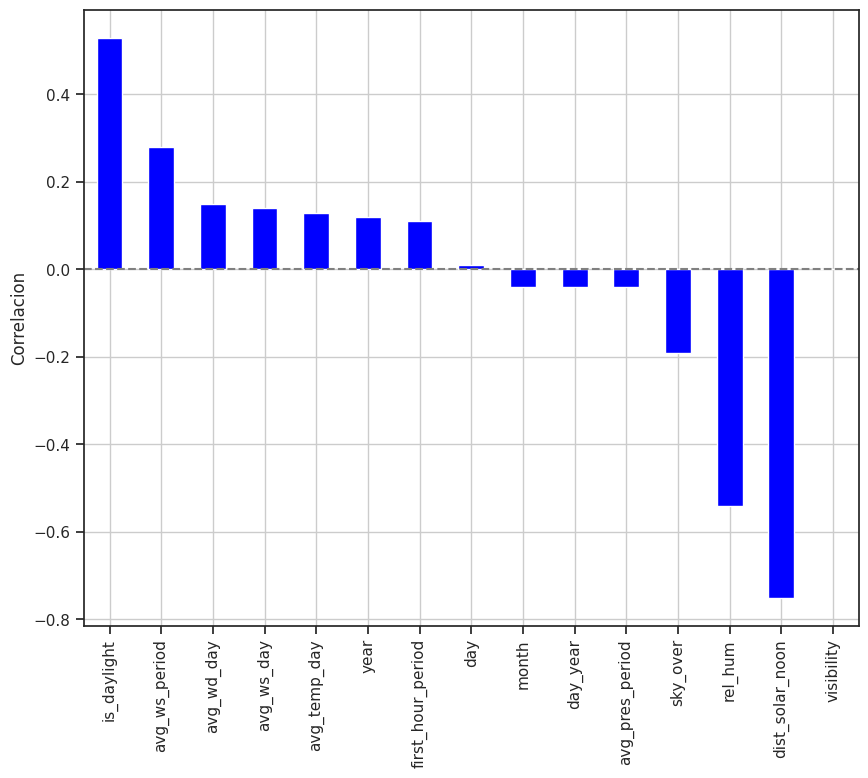

In [165]:
ax = round(df.corr()['power_gen'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar',color='blue' , figsize = (10,8))
ax.set_ylabel('Correlacion')
ax.axhline(0,color='gray',linestyle='--')
ax.grid()
plt.show() 

Podemos observar que la humedad relativa (correlación = 0.54) y la distancia al mediodía solar (correlación = 0.75) son las variables más correlacionadas con la potencia generada. Entre ellas, no se ve una fuerte correlación (0.37). Luego, es probable que ambas aporten a la potencia generada de manera independiente.
Tambien podemos observar que la variable si hay luz solar tiene una correlación del 53%.

A continuación, haremos un scatterplot para mostrar en detalle la correlación entre las variables más correlacionadas y la potencia generada.

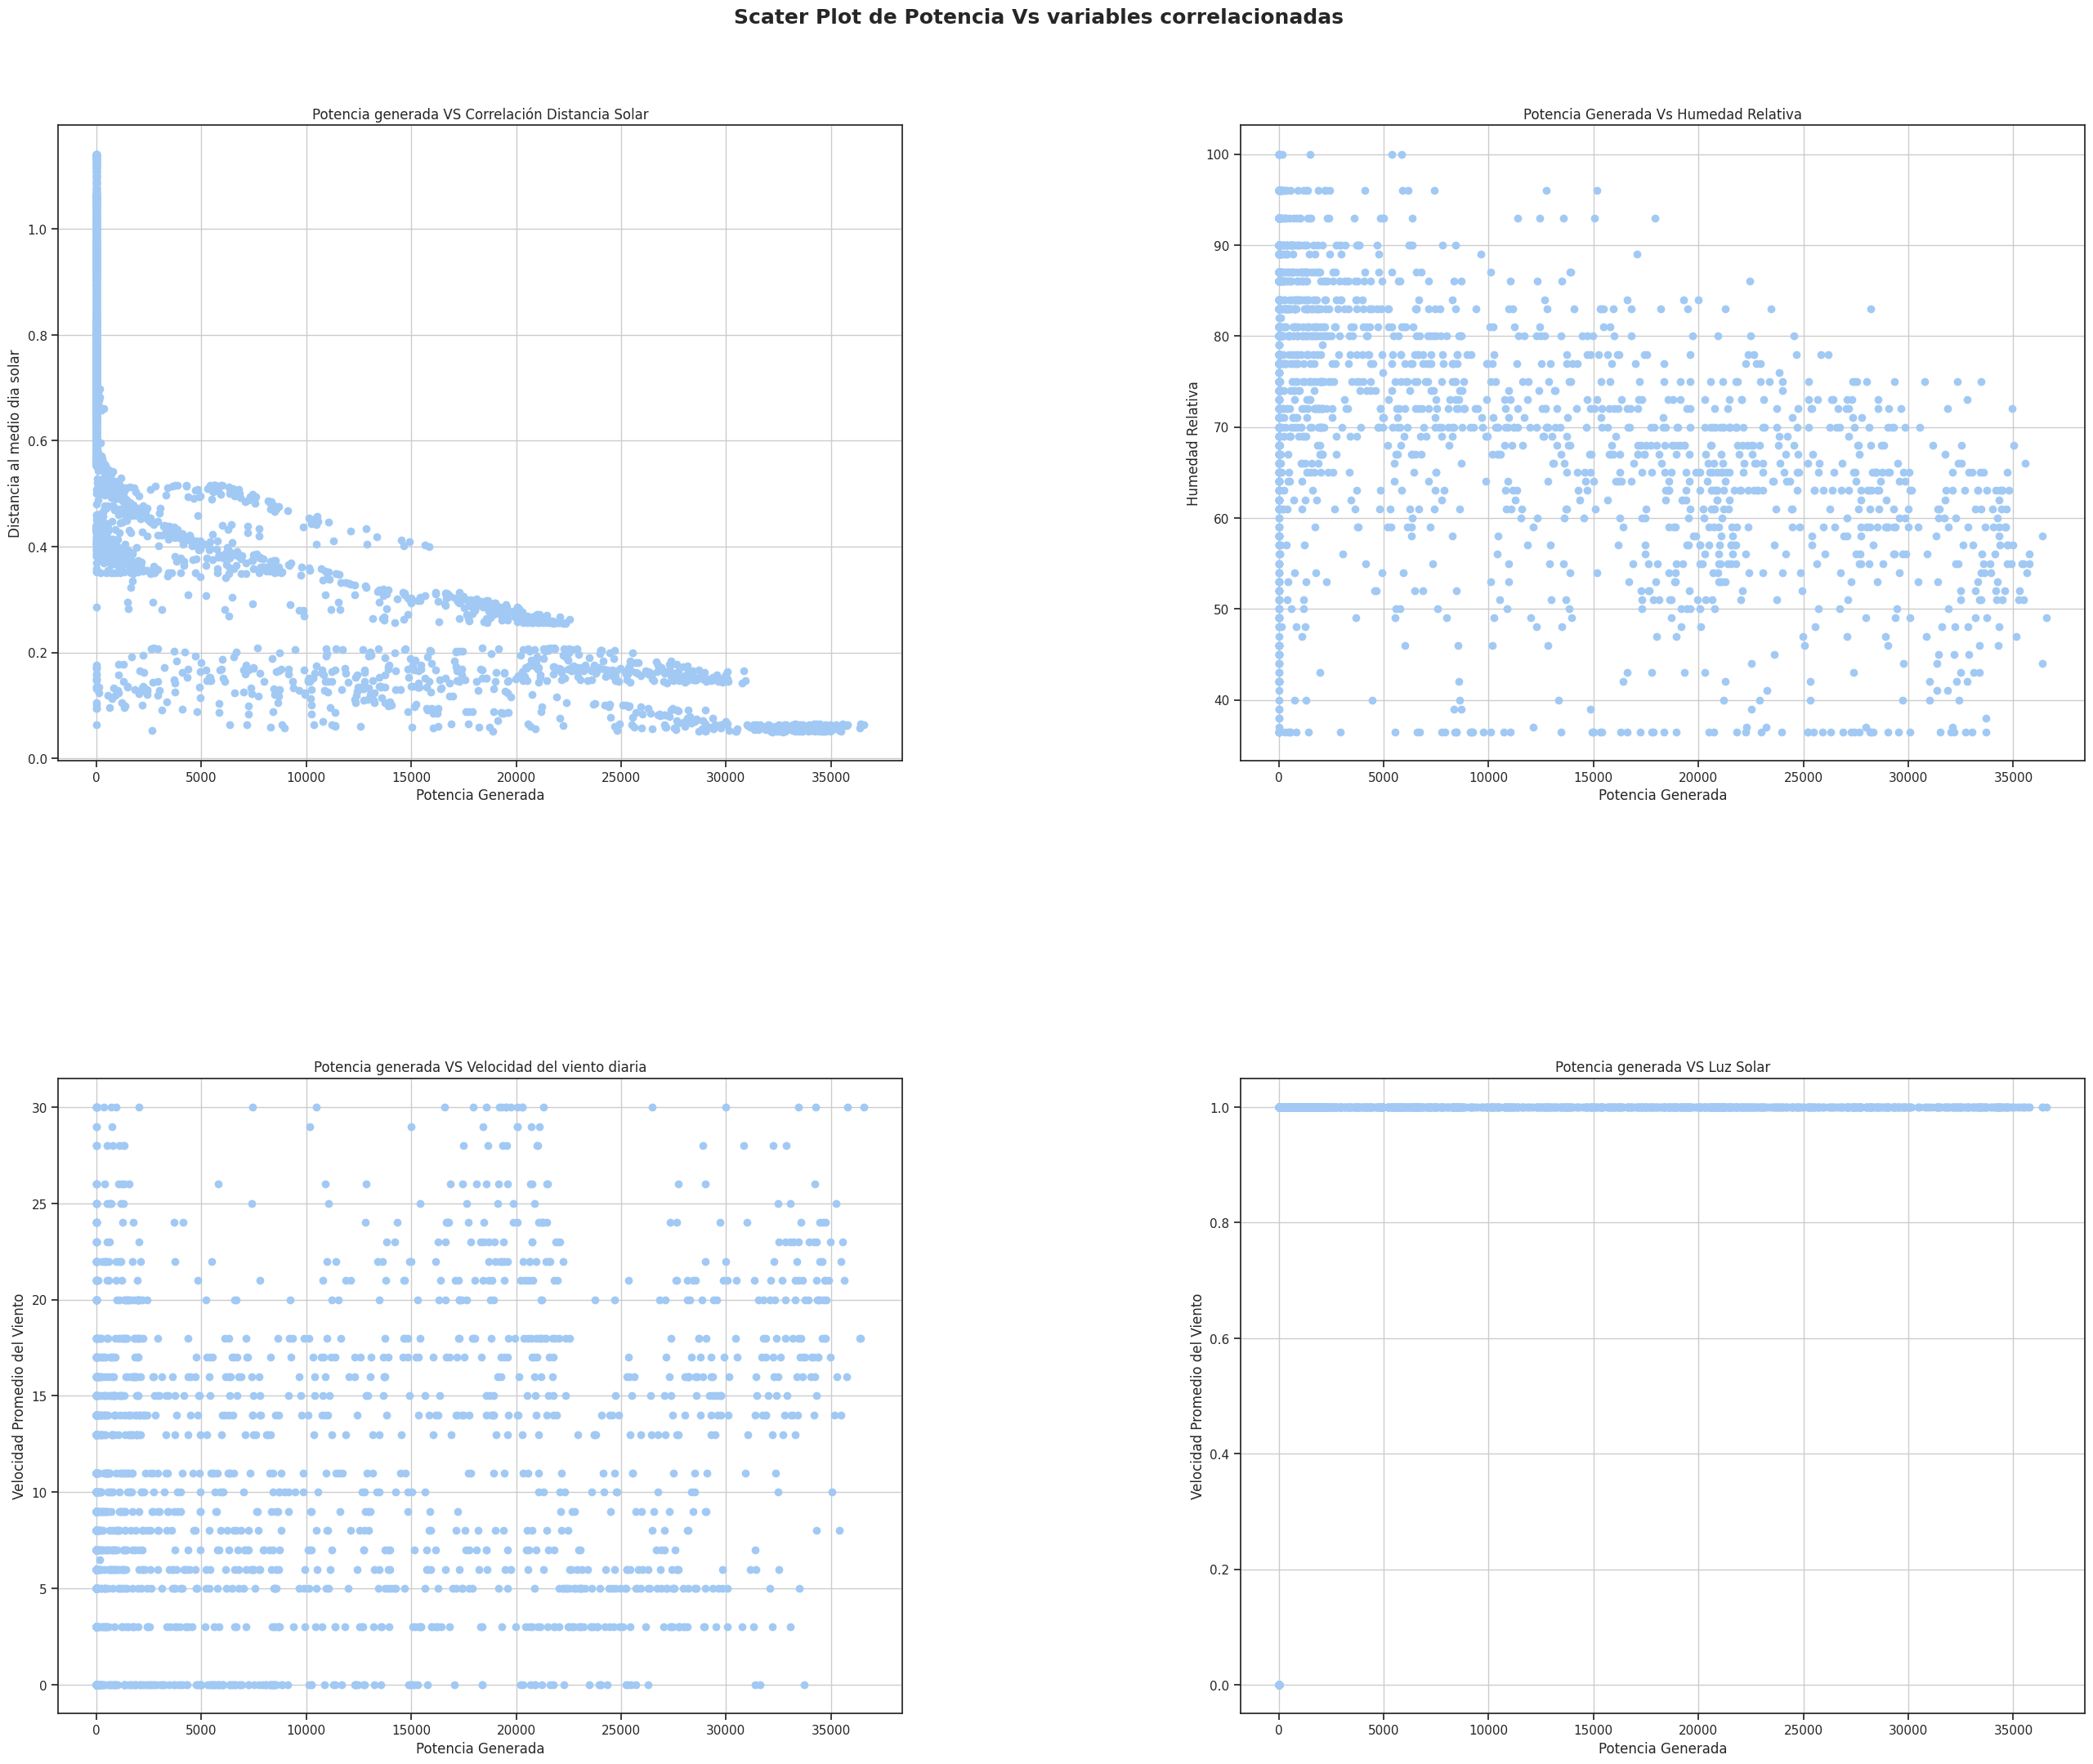

In [166]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('Scater Plot de Potencia Vs variables correlacionadas', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);

ax = fig.add_subplot(2, 2, 1)
ax.scatter(df['power_gen'],df['dist_solar_noon']) 
ax.set_title('Potencia generada VS Correlación Distancia Solar')
ax.set_xlabel("Potencia Generada")
ax.set_ylabel("Distancia al medio dia solar")
ax.grid(True)

ax = fig.add_subplot(2, 2, 2)
ax.scatter(df['power_gen'],df['rel_hum']) 
ax.set_title('Potencia Generada Vs Humedad Relativa')
ax.set_xlabel("Potencia Generada")
ax.set_ylabel("Humedad Relativa")
ax.grid(True)

ax = fig.add_subplot(2, 2, 3)
ax.scatter(df['power_gen'],df['avg_ws_period']) 
ax.set_title('Potencia generada VS Velocidad del viento diaria')
ax.set_xlabel("Potencia Generada")
ax.set_ylabel("Velocidad Promedio del Viento")
ax.grid(True)

ax = fig.add_subplot(2, 2, 4)
ax.scatter(df['power_gen'],df['is_daylight']) 
ax.set_title('Potencia generada VS Luz Solar')
ax.set_xlabel("Potencia Generada")
ax.set_ylabel("Velocidad Promedio del Viento")
ax.grid(True)
